## HW5 
## Hongbo Liu


a) Length of Narratives
Read in the data. Find and display the longest and shortest description.

In [331]:
import pandas as pd
import re

In [332]:
df=pd.read_csv("C:/Users/22151/Desktop/emergency.csv",header=None)

In [333]:
df.head()

,0
0,10 MO F FELL OUT OF SHOPPING CART;DX FRACTURED...
1,75YOF WITH LAC TO FINGER FROM METAL CAN
2,8YOF FRACTURED FINGER FELL OFF HER BIKE
3,9 YOM TACKLED DURING FOOTBALL PRACTICE. DX: C...
4,PT WAS HIT ON RT SIDE WHILE PLAYING FOOTBALL D...


In [334]:
df=df[0]

In [335]:
df.str.len().mean()   

76.4555

In [336]:
df[df.str.len()==df.str.len().max()]

109     40YOM-C/O FOOT/HEEL PAIN RUNNIJNG BACKWARDS FE...
511     19MOWF  PARENTS HOLDING PT.  DAD STATES SHE WA...
630     44YOF  PT HAVING SEVERE R ARM PAIN THAT IS RAD...
920     57 YO F WAS POURING KEROSENE OVER AN OPEN FLAM...
1111    13YOM DID OUTDOOR WORKOUT X1 1/2 HRS, DEVELOEP...
                              ...                        
9370    20 YO M, RUNNING FROM POLICE AFTER AN ALLEGED ...
9666    22YOM WAS LIGHTING PROPANE PIZZA OVEN ON FRI. ...
9670    45YOWM  TONIGHT PT WAS TRYING TO MOVE HIS FATH...
9749    PT.INJ.NOSE,HAND,WRIST,ELBOW WHEN RIDING BIKE ...
9853    15YF ON BUS TO SOCCER GAME&NOTICED "FUNNY SMEL...
Name: 0, Length: 66, dtype: object

In [337]:
df[df.str.len()==df.str.len().min()]

7127    ABR HIP ON FLOOR 
7731    INGESTION OF *** 
Name: 0, dtype: object

In [338]:
print("The longest description is {}.".format(df[109]))

The longest description is 40YOM-C/O FOOT/HEEL PAIN RUNNIJNG BACKWARDS FELT TEARING SENSATION IN F OOT AFTER WARM UP EXERCISES FOR SOCCER  DX PLANTER FASCITIS ACUTE FLARE.


In [339]:
print("The shortest description is {}.".format(df[7127]))

The shortest description is ABR HIP ON FLOOR .


b) Fractures
Find all narratives related to "fractures". Try to include singular/plural/verb forms in your search. Also, FX is the medical abbreviation for fracture, so include that as well. How many fracture narratives can you find?

In [340]:
fractures=[des for des in df if re.search(r'(FX|(FRACTURE*))',des)]

In [341]:
print("I found {} fracture narratives".format(len(fractures)))

I found 1499 fracture narratives


c) Body Parts
Among the fracture narratives, try to identify the body parts that are fractured (Note: Don't go overboard. A selection of parts is sufficient.). Make a histogram of fractured body parts (but make sure plural and singular forms are combined.)

In [342]:
skull=[des for des in fractures if re.search(r'SKULL*',des)]
hand=[des for des in fractures if re.search(r'HAND*',des)]
foot=[des for des in fractures if re.search(r'FOOT*',des)]
wrist=[des for des in fractures if re.search(r'WRIST*',des)]
shoulder=[des for des in fractures if re.search(r'SHOULDER*',des)]
elbow=[des for des in fractures if re.search(r'ELBOW*',des)]
chest=[des for des in fractures if re.search(r'CHEST*',des)]
face=[des for des in fractures if re.search(r'FACE*',des)]
finger=[des for des in fractures if re.search(r'FINGER*',des)]

In [343]:
d=[len(skull),len(hand),len(foot),len(wrist),len(shoulder),len(elbow),len(chest),len(face),len(finger)]

In [344]:
parts=["skull","hand","foot","wrist","shoulder","elbow","chest","face","finger"]

<BarContainer object of 9 artists>

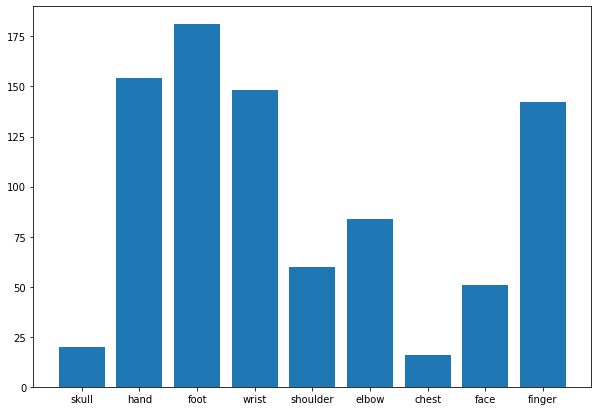

In [345]:
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure(figsize =(10, 7))
plt.bar(parts,d)

d) Age and Gender
Let's try to extract age and gender. In a number of narratives you may have noticed a pattern:

In [346]:
year=[des for des in df if re.search(r'\d{1,}\s?(YO|YR|Y|YOM|YOF|YEAR)',des)]
month=[des for des in df if re.search(r'\d{1,}\s?(MO|MONTH|MOM|MOF)',des)]

In [347]:
year_male_0=[des for des in year if re.search(r'YO\s?M',des)]
year_male_1=[des for des in year if re.search(r'MALE',des)]
year_male=year_male_0+year_male_1

In [348]:
year_female_0=[des for des in year if re.search(r'YO\s?F',des)]
year_female_1=[des for des in year if re.search(r'FEMALE',des)]
year_female=year_female_0+year_female_1

In [349]:
month_male_0=[des for des in month if re.search(r'MO\s?M',des)]
month_male_1=[des for des in month if re.search(r'MALE',des)]
month_male=month_male_0+month_male_1

In [350]:
month_female_0=[des for des in month if re.search(r'MO\s?F',des)]
month_female_1=[des for des in month if re.search(r'FEMALE',des)]
month_female=month_female_0+month_female_1

In [351]:
df2=[]
for i in year+month: 
    kk=[]
    if i in year_male:
        kk=[i,"male",float(re.search("\d{1,}",i)[0])]
        df2.append(kk)
    if i in year_female:
        kk=[i,"female",float(re.search("\d{1,}",i)[0])]
        df2.append(kk)
    if i in month_male:
        kk=[i,"male",float(re.search("\d{1,}",i)[0])//12]
        df2.append(kk)
    if i in month_female:
        kk=[i,"female",float(re.search("\d{1,}",i)[0])//12]
        df2.append(kk)

In [352]:
df_2=pd.DataFrame(df2,columns = ["text","gender","age"])

In [353]:
df_2

,text,gender,age
0,75YOF WITH LAC TO FINGER FROM METAL CAN,female,75.0
1,8YOF FRACTURED FINGER FELL OFF HER BIKE,female,8.0
2,9 YOM TACKLED DURING FOOTBALL PRACTICE. DX: C...,male,9.0
3,DX NASAL INJ: 9YOM C/O FELL OFF SWING @ SCHOOL...,male,9.0
4,12YOF FELL DOWN STAIRS DX: FX RADIUS,female,12.0
...,...,...,...
7906,18 MOF FELL HITTING FACE ON CONCRETE STEP SUST...,female,1.0
7907,18MOM BEING CARRIED BY GRRANDFATHER WHO FELL D...,male,1.0
7908,1MOF DAD FELL ASLEEP HOLDING PT ON HIS CHEST I...,female,0.0
7909,DX: 19 MO F AT HOME SWALLOWED 1OZ OF ***ROLL O...,female,1.0


Text(0, 0.5, 'number of injuries')

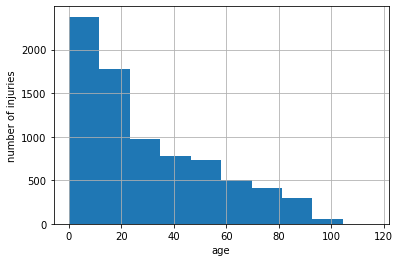

In [354]:
import numpy as np
import matplotlib.pyplot as plt
df_2["age"].hist()
plt.xlabel("age")
plt.ylabel("number of injuries")

Text(0, 0.5, 'number of injuries')

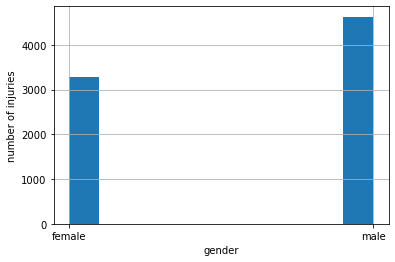

In [355]:
df_2["gender"].hist()
plt.xlabel("gender")
plt.ylabel("number of injuries")

In [356]:
x1=df_2.loc[df_2.gender=="female","age"]
x2=df_2.loc[df_2.gender=="male","age"]
kwargs = dict(alpha=0.5,density=True, stacked=True)

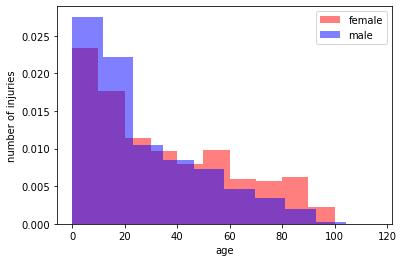

In [357]:
plt.hist(x1,**kwargs,color="r",label="female")
plt.hist(x2,**kwargs,color="b",label="male")
plt.xlabel("age")
plt.ylabel("number of injuries")
plt.legend()

In [358]:
print("The number of men in the injuries data is {}.".format(len(df_2[df_2["gender"]=="male"])))

The number of men in the injuries data is 4627.


In [359]:
print("The number of women in the injuries data is {}".format(len(df_2[df_2["gender"]=="female"])))

The number of women in the injuries data is 3284
